In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2020-player-performance/IPL 2020 Squads.csv
/kaggle/input/ipl-2020-player-performance/sample_submission.csv
/kaggle/input/ipl-2020-player-performance/Matches IPL 2020.csv
/kaggle/input/ipl-2020-player-performance/Matches IPL 2008-2019.csv
/kaggle/input/ipl-2020-player-performance/Training.csv


In [2]:
df_train = pd.read_csv('../input/ipl-2020-player-performance/Training.csv')
match2020 = pd.read_csv('../input/ipl-2020-player-performance/Matches IPL 2020.csv')
prev_match = pd.read_csv('../input/ipl-2020-player-performance/Matches IPL 2008-2019.csv')
players =  pd.read_csv('../input/ipl-2020-player-performance/IPL 2020 Squads.csv', encoding='windows-1254')
df_train.head()

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86


In [3]:
prev_match.isna().sum()

match_id             0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Quite a few Null Values

# **Visualization**

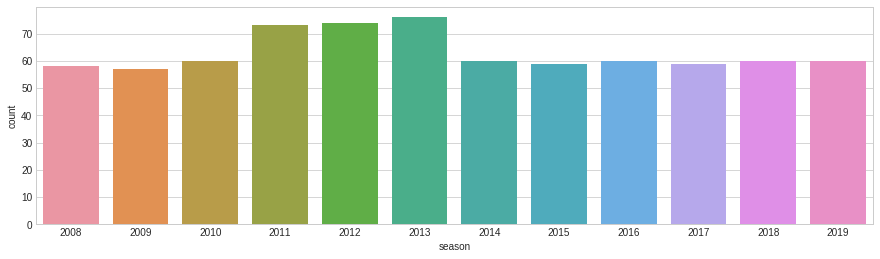

In [4]:
plt.subplots(figsize = (15,4))
sns.countplot(x = prev_match['season'] , data = prev_match)
plt.show()

Most Matches Played in 2013

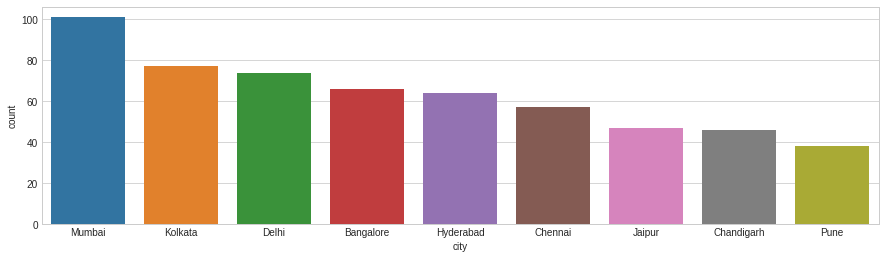

In [5]:
plt.subplots(figsize = (15,4))
sns.countplot(x = prev_match['city'] , data = prev_match , 
              order = prev_match.city.value_counts().iloc[:9].index)
plt.show()

Most Matches played in Mumbai



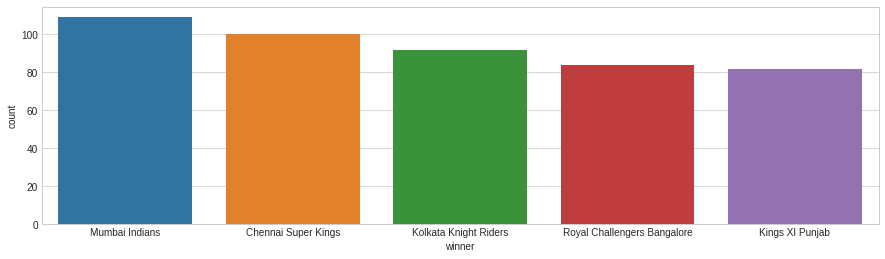

In [6]:
plt.subplots(figsize = (15,4))
sns.countplot(x = prev_match['winner'] , data = prev_match ,
              order = prev_match.winner.value_counts().iloc[:5].index)
plt.show()

Mumbai Indians Won the Most Matches

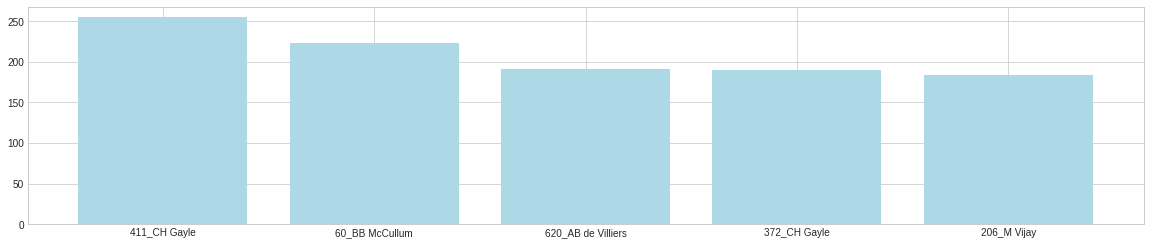

In [7]:
best_player = df_train.nlargest(5 , ['Batting_Points'])
plt.subplots(figsize = (20,4))
plt.bar(best_player['Id'] , best_player['Batting_Points'] , color = 'lightblue')
plt.show()

Chris Gayle is the Best Player

# **Data Cleaning**

In [8]:
df_train['player'] = df_train['Id']
df_train['number'] = df_train['Id']

for i in range(len(df_train)):
    df_train['player'][i] = df_train['Id'][i].split("_")[-1]
    df_train['number'][i] = int(df_train['Id'][i].split('_')[:1][0])
    
df_train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points,player,number
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25,Bipul Sharma,1
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44,DJ Hooda,1
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38,KM Jadhav,1
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29,Mandeep Singh,1
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86,Yuvraj Singh,1


In [9]:
df = pd.DataFrame()
df['match_number'] = df_train['number']
df['player'] = df_train['player']
df['total_score'] = df_train['Total Points']

In [10]:
df = df.groupby(['player', 'match_number'], axis = 0, as_index = False).sum()
df.index = df['player']
df.drop('player', axis = 1, inplace = True)
df

,match_number,total_score
player,,
A Ashish Reddy,331,0
A Ashish Reddy,341,50
A Ashish Reddy,346,38
A Ashish Reddy,348,25
A Ashish Reddy,352,28
...,...,...
Z Khan,612,25
Z Khan,623,27
Z Khan,625,0


In [11]:
match1 = df[df.match_number == 1]['total_score'].sort_index(ascending = True)
match2 = df[df.match_number == 2]['total_score'].sort_index(ascending = True)
match3 = df[df.match_number == 3]['total_score'].sort_index(ascending = True)
match4 = df[df.match_number == 4]['total_score'].sort_index(ascending = True)

In [12]:
train_df = df.groupby('player').apply(lambda x: x.iloc[1:-1])
test_df = df.groupby('player').tail(1)
test_df.head()

,match_number,total_score
player,,
A Ashish Reddy,603,2
A Chandila,436,25
A Chopra,121,13
A Choudhary,45,33
A Dananjaya,7902,4


# **Model**

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

model = ExponentialSmoothing(np.asarray(train_df['total_score']) , seasonal_periods = 10 , 
                            trend = 'additive' , seasonal = None)

model_fit = model.fit(smoothing_level = 0.2 , smoothing_trend = 0.01 , optimized = False)

params = model_fit.params

test = test_df.copy()

test['forecast'] = model_fit.forecast(559)
test['forecast'].abs()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


player
A Ashish Reddy    17.921571
A Chandila        17.804561
A Chopra          17.687550
A Choudhary       17.570539
A Dananjaya       17.453528
                    ...    
YV Takawale       46.902421
Yashpal Singh     47.019432
Younis Khan       47.136442
Yuvraj Singh      47.253453
Z Khan            47.370464
Name: forecast, Length: 559, dtype: float64

# **Prepping Dataset for Submission**

In [14]:
pred_df = pd.read_csv('../input/ipl-2020-player-performance/sample_submission.csv')

pred_df['player'] = pred_df['Id']
pred_df['number'] = pred_df['Id']

for i in range(0, len(pred_df)):
    pred_df['player'][i] = pred_df['Id'][i].split("_")[-1]
    pred_df['number'][i] = int(pred_df['Id'][i].split('_')[:1][0])
    
df = pd.DataFrame()
df['match_number'] = pred_df['number']
df['player'] = df_train['player']
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,match_number,player
0,1216492,Bipul Sharma
1,1216492,DJ Hooda
2,1216492,KM Jadhav
3,1216492,Mandeep Singh
4,1216492,Yuvraj Singh


In [15]:
df = df.groupby(['player', 'match_number'], axis = 0, as_index = False).sum()
df.drop('player', axis = 1, inplace = True)
df

,match_number
0,1216492
1,1216520
2,1216528
3,1216533
4,1216536
...,...
1274,1216535
1275,1216540
1276,1216542
1277,1216546


In [16]:
test_data = df.copy()
test_data['forecast'] = model_fit.forecast(1279)
predictions = test_data['forecast'].abs() 

predictions

0        17.921571
1        17.804561
2        17.687550
3        17.570539
4        17.453528
           ...    
1274    131.150208
1275    131.267219
1276    131.384230
1277    131.501241
1278    131.618252
Name: forecast, Length: 1279, dtype: float64

In [17]:
df = pd.DataFrame()
df['match_number'] = pred_df['number']
df['player'] = df_train['player']
df = df.groupby(['player', 'match_number'], axis = 0, as_index = False).sum()
df['id'] = pred_df['number']

for i in range(len(df)):
    df['id'][i] = df['match_number'][i].astype('str') + str('_') + df['player'][i]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# df.drop('player' , axis = 1 , inplace = True)
# df

In [19]:
df['Total Points'] = predictions
df = df.sort_values(by = ['match_number'])
df

,match_number,player,id,Total Points
0,1216492,A Choudhary,1216492_A Choudhary,17.921571
1121,1216492,Sachin Baby,1216492_Sachin Baby,113.247554
1094,1216492,STR Binny,1216492_STR Binny,110.088261
1072,1216492,SR Watson,1216492_SR Watson,107.514024
945,1216492,S Dhawan,1216492_S Dhawan,92.653650
...,...,...,...,...
809,1237181,PA Patel,1237181_PA Patel,76.740179
858,2433038,RA TripathiRA Tripathi,2433038_RA TripathiRA Tripathi,82.473709
78,2433038,AM RahaneAM Rahane,2433038_AM RahaneAM Rahane,8.794728
666,2433038,MK TiwaryMK Tiwary,2433038_MK TiwaryMK Tiwary,60.007632


In [20]:
sub = pd.DataFrame()
sub['id'] = df['id']
sub['Total Points'] = df['Total Points']
sub

,id,Total Points
0,1216492_A Choudhary,17.921571
1121,1216492_Sachin Baby,113.247554
1094,1216492_STR Binny,110.088261
1072,1216492_SR Watson,107.514024
945,1216492_S Dhawan,92.653650
...,...,...
809,1237181_PA Patel,76.740179
858,2433038_RA TripathiRA Tripathi,82.473709
78,2433038_AM RahaneAM Rahane,8.794728
666,2433038_MK TiwaryMK Tiwary,60.007632


In [21]:
sub.to_csv('Neolen.csv', index = False)